In [ ]:
# This notebook is a descendent from "Gradient Correction 1.ipynb" i  "Gradient Correction 2.ipynb"

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [2]:
#Change directory
%cd 'drive/My Drive/results/synthetic_regul/'

/content/drive/My Drive/results/synthetic_regul


In [3]:
#!pip uninstall gradient_correction  
!pip install https://github.com/Antonio-Ionaton/GradientCorrection/tarball/main

     | 45.3 MB 9.2 MB/s
  Created wheel for gradient-correction: filename=gradient_correction-0.1-py3-none-any.whl size=9851 sha256=66eb288fbc6af2881f634b344e112905295c329419d9ef652d706ab671c309b5
  Stored in directory: /tmp/pip-ephem-wheel-cache-iipmjcsb/wheels/03/4c/0a/9516d8fa386ed9a21d1aa50e8cc5b1f6d6f576195897b24409
Successfully built gradient-correction


In [4]:
import numpy as np
import gradient_correction
from gradient_correction import  helper, explain, model_zoo, geomath, plotter

In [5]:
import pickle
file_cnn_deep_relu = open("cnn_deep_relu_results.pickle", "rb")
file_cnn_deep_exp = open("cnn_deep_exponential_results.pickle", "rb")
file_cnn_shallow_relu = open("cnn_shallow_relu_results.pickle", "rb")
file_cnn_shallow_exp = open("cnn_shallow_exponential_results.pickle", "rb")

In [6]:
results={}

In [7]:
results['deep_relu'] = pickle.load(file_cnn_deep_relu)
results['deep_exp'] = pickle.load(file_cnn_deep_exp)
results['shallow_relu'] = pickle.load(file_cnn_shallow_relu)
results['shallow_exp'] = pickle.load(file_cnn_shallow_exp)

In [8]:
for keys in results['deep_relu']:
    print(keys)

auc
saliency


In [9]:
Performance={}
Performance['deep_relu'] = np.array(results['deep_relu']['auc'])
Performance['deep_exp'] = np.array(results['deep_exp']['auc'])
Performance['shallow_relu'] = np.array(results['shallow_relu']['auc'])
Performance['shallow_exp'] = np.array(results['shallow_exp']['auc'])
print(Performance['deep_relu'].shape)

(10,)


In [10]:
Cosine={}
Cosine['deep_relu']=np.array(results['deep_relu']['saliency']['cos_dist'])
Cosine['deep_exp']=np.array(results['deep_exp']['saliency']['cos_dist'])
Cosine['shallow_relu']=np.array(results['shallow_relu']['saliency']['cos_dist'])
Cosine['shallow_exp']=np.array(results['shallow_exp']['saliency']['cos_dist'])

Angles={}
Angles['deep_relu']=np.array(results['deep_relu']['saliency']['angles_std'])
Angles['deep_exp']=np.array(results['deep_exp']['saliency']['angles_std'])
Angles['shallow_relu']=np.array(results['shallow_relu']['saliency']['angles_std'])
Angles['shallow_exp']=np.array(results['shallow_exp']['saliency']['angles_std'])


In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

# CNN-deep-relu

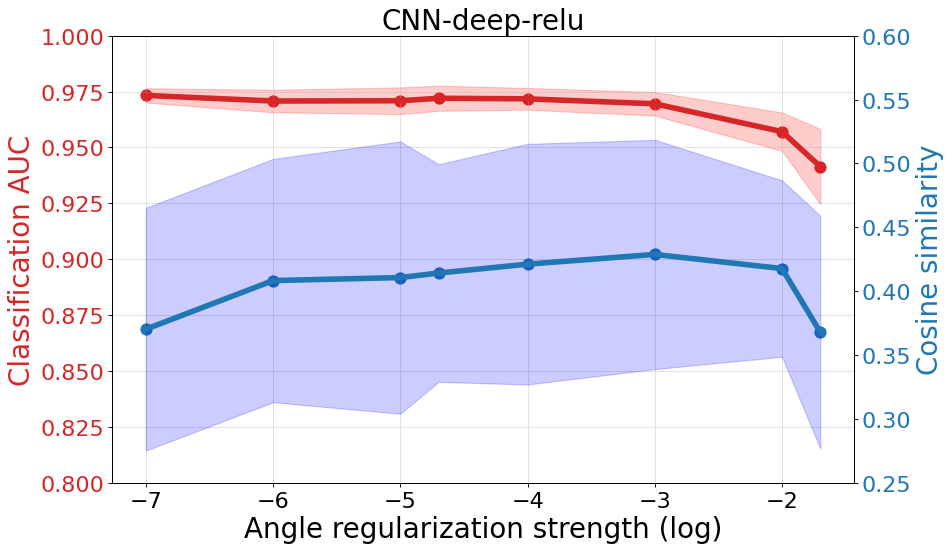

In [12]:
# Import Data

#CNN-deep-relu MEASUREMENTS
experiment_name='CNN-deep-relu'
#reg = [1e-1, 2e-2, 1e-2, 1e-3, 1e-4, 2e-5, 1e-5, 1e-6, 1e-7]
log_reg = [-1.698970004, -2, -3, -4, -4.698970004, -5, -6, -7]
Performance = [0.941455759, 0.957064422, 0.969532661, 0.971738883, 0.972013273, 0.970878987, 0.970767406, 0.973276337]  #Performance
Cosine = [0.36785123, 0.41768402, 0.42875326, 0.42113614, 0.41418618, 0.41063312, 0.40829164, 0.3702104] #Cosine
Performance_std = [0.016838232, 0.008598579, 0.005267723, 0.004863918, 0.005611217, 0.005974473, 0.0050409, 0.003213569] #Performance std
Cosine_std = [0.091175705, 0.06906439, 0.08975429, 0.0941875, 0.08518673, 0.10660934, 0.09524413, 0.09502306] #Cosine std

plotter.plot_regularization(experiment_name, log_reg, Performance, Cosine, Performance_std, Cosine_std, y1_min=0.8, y1_max=1, y2_min=0.25, y2_max=0.6, labelsize=20, fontsize=25)

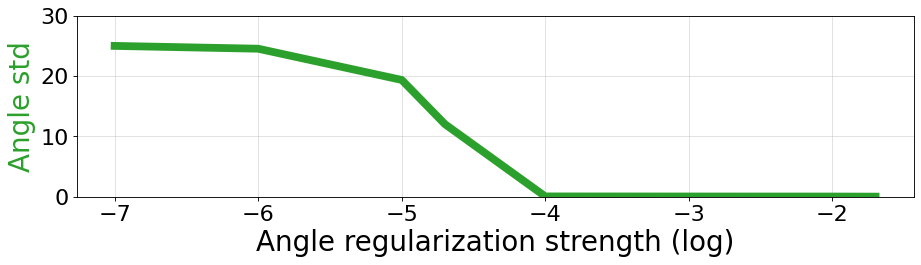

In [13]:
log_reg = [-1.698970004, -2, -3, -4, -4.698970004, -5, -6, -7]
Angles_std = [0.021952994, 0.03944823, 0.045315202, 0.059175, 12.023429, 19.344257, 24.513891, 24.978815]

plotter.plot_regularization_angles(log_reg, Angles_std, y_min=0, y_max=30, labelsize=20, fontsize=25)

# CNN-shallow-relu

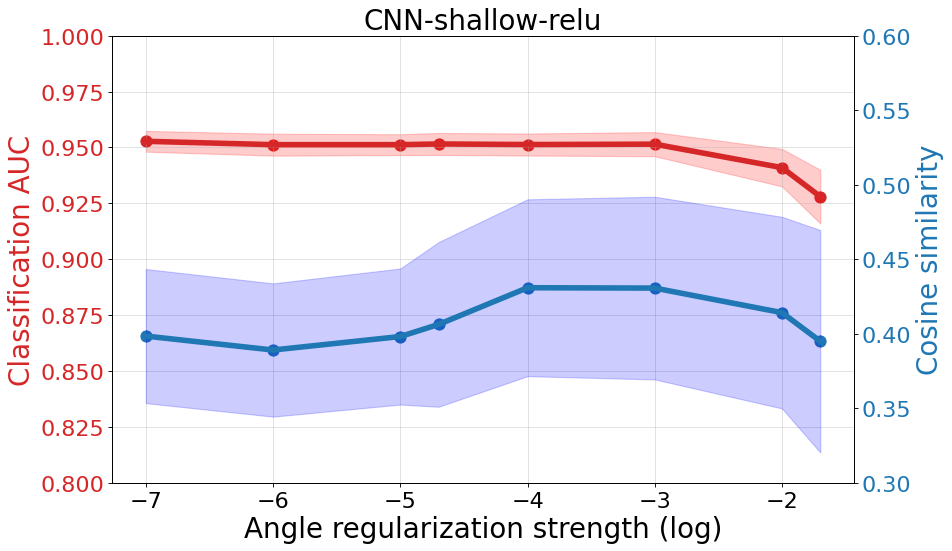

In [14]:
#CNN-shallow-relu MEASUREMENTS

experiment_name='CNN-shallow-relu'
#reg = [1e-1, 5e-2, 2e-2, 1e-2, 1e-3, 1e-4, 2e-5, 1e-5, 1e-6, 1e-7]
log_reg = [-1.698970004, -2, -3, -4, -4.698970004, -5, -6, -7]
Performance = [0.92799886, 0.940968217, 0.951470008, 0.951302931, 0.951561218, 0.951244743, 0.951240562, 0.952751102]  #Performance
Cosine = [0.39493778, 0.41415825, 0.43063313, 0.4308692, 0.40624648, 0.3981281, 0.38908222, 0.39842927] #Cosine
Performance_std = [0.011993694, 0.008396683, 0.005403387, 0.004928373, 0.004923825, 0.004668332, 0.004910859, 0.004654872] #Performance std
Cosine_std = [0.074616134, 0.06428796, 0.061298102, 0.05933602, 0.055241477, 0.045641657, 0.044715315, 0.04499677] #Cosine std

plotter.plot_regularization(experiment_name, log_reg, Performance, Cosine, Performance_std, Cosine_std, y1_min=0.8, y1_max=1, y2_min=0.3, y2_max=0.6, labelsize=20, fontsize=25)

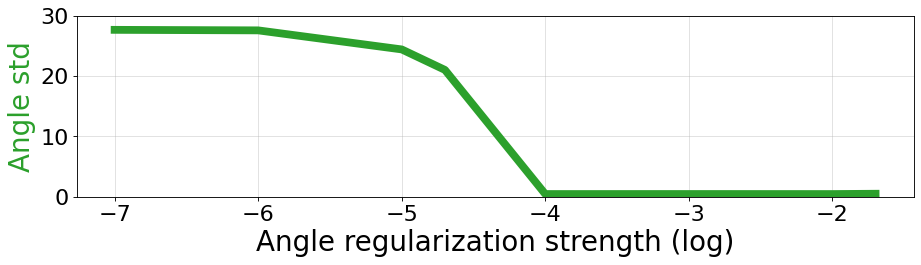

In [15]:
log_reg = [-1.698970004, -2, -3, -4, -4.698970004, -5, -6, -7]
Angles_std = [0.49968395, 0.45052144, 0.45709625, 0.4516125, 21.005564, 24.396841, 27.551672, 27.63793]

plotter.plot_regularization_angles(log_reg, Angles_std, y_min=0, y_max=30, labelsize=20, fontsize=25)

# CNN-deep-exp

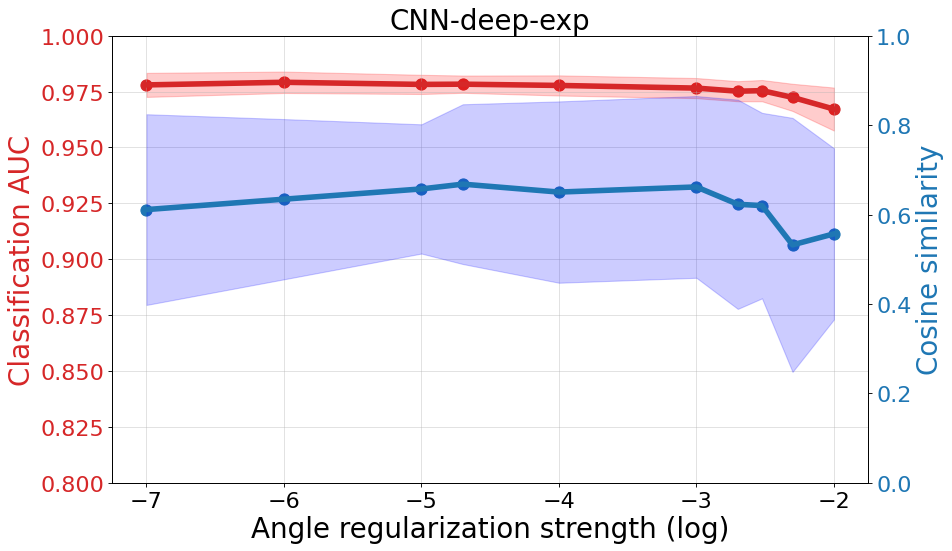

In [16]:
#CNN-deep-exp MEASUREMENTS

experiment_name='CNN-deep-exp'
#reg = [1e-1, 5e-2, 2e-2, 1e-2, 1e-3, 1e-4, 2e-5, 1e-5, 1e-6, 1e-7(x100)]
log_reg = [-2, -2.301029996, -2.522878745, -2.698970004, -3, -4, -4.698970004, -5, -6, -7]
Performance = [0.96716243, 0.972398452, 0.975408827, 0.97515258, 0.976547566, 0.977736085, 0.978302267, 0.978198371, 0.97915039, 0.977977241]  #Performance
Cosine = [0.5567677, 0.5320687, 0.6199497, 0.62290037, 0.6616843, 0.6501758, 0.66792977, 0.6572229, 0.6342612, 0.6110146] #Cosine
Performance_std = [0.009620766, 0.006082432, 0.004761599, 0.004486253, 0.004500089, 0.004503273, 0.003866931, 0.004293372, 0.004789531, 0.005377678] #Performance std
Cosine_std = [0.19145621, 0.2840372, 0.20744507, 0.2339909, 0.20321482, 0.20278588, 0.1786776, 0.14451955, 0.17917383, 0.21328825] #Cosine std

plotter.plot_regularization(experiment_name, log_reg, Performance, Cosine, Performance_std, Cosine_std, y1_min=0.8, y1_max=1, y2_min=0, y2_max=1, labelsize=20, fontsize=25)

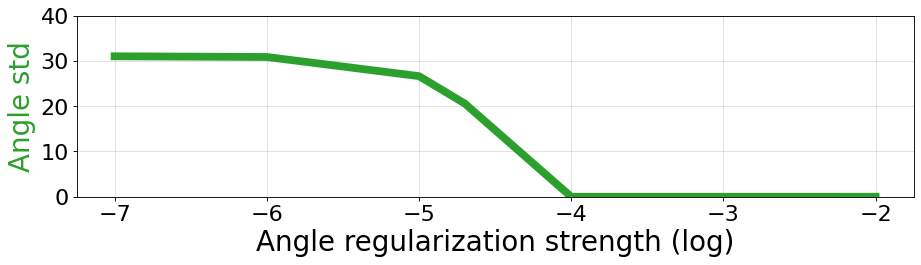

In [17]:
log_reg = [-2, -2.301029996, -2.522878745, -2.698970004, -3, -4, -4.698970004, -5, -6, -7]
Angles_std = [0.005676268, 0.002867009, 0.002807614, 0.004346054, 0.004200131, 0.003103627, 20.577852, 26.632734, 30.860018, 31.013243]

plotter.plot_regularization_angles(log_reg, Angles_std, y_min=0, y_max=40, labelsize=20, fontsize=25)

# CNN-shallow-exp

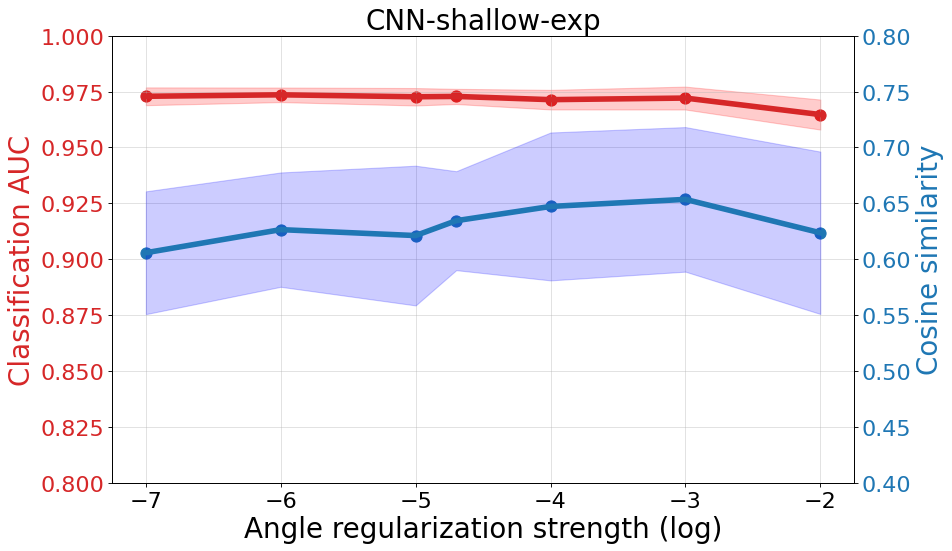

In [18]:
#CNN-shallow-exp MEASUREMENTS
experiment_name='CNN-shallow-exp'
log_reg = [-2, -3, -4, -4.698970004, -5, -6, -7]
Performance = [0.964711363, 0.972088435, 0.97137699, 0.972821346, 0.972669568, 0.973545414, 0.972880942]  #Performance
Cosine = [0.6236587, 0.6535451, 0.647211, 0.63448215, 0.6211646, 0.62647396, 0.6057976] #Cosine
Performance_std = [0.006718292, 0.005123571, 0.004378859, 0.003393487, 0.003897482, 0.003258382, 0.003977907] #Performance std
Cosine_std = [0.0726126, 0.06467024, 0.066156976, 0.0442635, 0.062501855, 0.051141087, 0.05492181] #Cosine std

plotter.plot_regularization(experiment_name, log_reg, Performance, Cosine, Performance_std, Cosine_std, y1_min=0.8, y1_max=1, y2_min=0.4, y2_max=0.8, labelsize=20, fontsize=25)

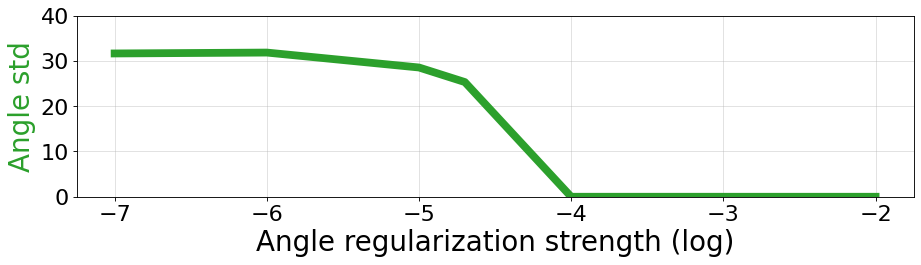

In [19]:
log_reg = [-2, -3, -4, -4.698970004, -5, -6, -7]
Angles_std = [0.002455039, 0.002696348, 0.003887756, 25.325163, 28.538591, 31.835224, 31.638182]

plotter.plot_regularization_angles(log_reg, Angles_std, y_min=0, y_max=40, labelsize=20, fontsize=25)